In [183]:
# base tools
import os, sys, random, cv2
sys.path.append(os.path.join(".."))

from utils.imutils import jimshow
from utils.imutils import jimshow_channel

# data analysis
import numpy as np
from PIL import Image
from numpy.linalg import norm
from tqdm import tqdm

# tensorflow
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# style utils 
from utils.styletransfer import *

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [52]:
# Load TF-Hub module.
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

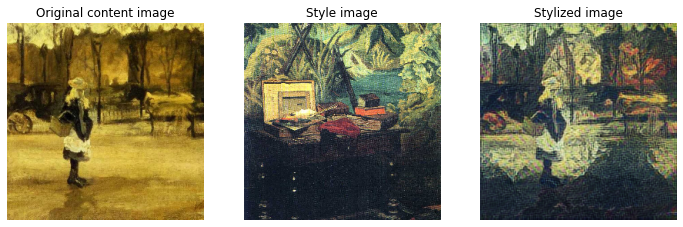

In [222]:
#Trying it out for two files 
content_image = st_load("data/VanGogh/205638.jpg")
style_image = st_load("data/Monet/211710.jpg")

outputs = hub_module(content_image, style_image)

stylized_image = outputs[0]

show_n([content_image, style_image, stylized_image], 
       titles=['Original content image', 'Style image', 'Stylized image'])

In [223]:
# Get list of filenames
vangogh_filenames = os.listdir(os.path.join("data", "content_vangogh_style_vangogh"))
monet_filenames = os.listdir(os.path.join("data", "content_monet_style_monet"))

# Have subset to test on
vangogh_filenames = vangogh_filenames[:100]
monet_filenames = monet_filenames[:100]

# Have same length (exclude images in largest dataset that exceed length of shortest dataset)
if len(monet_filenames) > len(vangogh_filenames):
    monet_filenames = monet_filenames[:len(vangogh_filenames)]
elif len(monet_filenames) < len(vangogh_filenames):
    vangogh_filenames = vangogh_filenames[:len(monet_filenames)]
    
# Create random image pairings 
random.shuffle(monet_filenames)
random.shuffle(vangogh_filenames)
image_pairs = zip(vangogh_filenames, monet_filenames)

In [ ]:
# Create folders for the generated images if they don't exist
if not os.path.exists(os.path.join("data", "content_monet_style_vangogh")):
    os.mkdir(os.path.join("data", "content_monet_style_vangogh"))
if not os.path.exists(os.path.join("data", "content_vangogh_style_monet")):
    os.mkdir(os.path.join("data", "content_vangogh_style_monet"))

In [224]:
# Creating counter for unique names of new files
counter = 0

# For pair of two images in image pairs
for van_name, mon_name in zip(vangogh_name, monet_name):
    
    # Unique ending to outpath for new generated images
    counter += 1
    
    # Load image pairs
    van = st_load(os.path.join("data", "VanGogh", van_name))
    mon = st_load(os.path.join("data", "Monet", mon_name))
    
    # Get the generated images as np.asarrays
    content_vangogh_style_monet = np.asarray(hub_module(van, mon)[0][0]) # First argument is content image, second is style
    content_monet_style_vangogh = np.asarray(hub_module(mon, van)[0][0]) # First argument is content image, second is style
    
    # Save generated images
    outpath = os.path.join("data", "content_monet_style_vangogh", f"content_monet_style_vangogh_{counter}.jpg")
    cv2.imwrite(filename, content_monet_style_vangogh*255) # cv2.imwrite cannot handle float values between 0 and 1
    
    outpath = os.path.join("data", "content_vangogh_style_monet", f"content_vangogh_style_monet_{counter}.jpg")
    cv2.imwrite(filename, content_vangogh_style_monet*255) # cv2.imwrite cannot handle float values between 0 and 1

In [ ]:
# Define function for resizing and making into array
def get_resized_arrays(paintings, width, height):
    # Empty list for appending to
    paintings_resized = []
    
    # For every painting in the list of paintings
    for painting in paintings:
        # Resize painting
        resized = cv2.resize(painting, (width, height), interpolation = cv2.INTER_AREA)
        # Normalize painting
        resized = resized.astype("float") / 255.
        # Append to list
        paintings_resized.append(resized)
    
    # Make into arrays with same dimensions instead of lists
    paintings_resized = np.array(paintings_resized).reshape(len(paintings_resized), width, height, 3)
    
    # Return
    return paintings_resized
